<h2><center>Sales Analysis</center></h2>

##### Importing necessary packages

In [21]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

### Data Collection

In [2]:
# df = pd.concat(map(pd.read_csv, ["./Sales_Data/Sales_January_2019.csv", "./Sales_Data/Sales_February_2019.csv", "./Sales_Data/Sales_March_2019.csv", "./Sales_Data/Sales_April_2019.csv", "./Sales_Data/Sales_May_2019.csv", "./Sales_Data/Sales_June_2019.csv", "./Sales_Data/Sales_July_2019.csv", "./Sales_Data/Sales_August_2019.csv", "./Sales_Data/Sales_September_2019.csv", "./Sales_Data/Sales_October_2019.csv", "./Sales_Data/Sales_November_2019.csv", "./Sales_Data/Sales_December_2019.csv"]))
# df.to_csv("complete_data.csv", index = False)
# Above method can also be used., but less efficient as we need to type every file name individually.

files = [file for file in os.listdir("./Sales_Data")]
all_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_data = pd.concat([all_data, df])
    
all_data.to_csv("all_data.csv", index = False)

In [5]:
all_data = pd.read_csv("all_data.csv")
all_data = all_data.copy()

In [6]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Data cleaning & preprocessing

##### Drop NAN values

In [7]:
all_data.dropna(axis=0, how="all", inplace=True)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [8]:
all_data[all_data["Quantity Ordered"]=="Quantity Ordered"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


##### Deleting all the invalid values

In [9]:
all_data = all_data[all_data["Quantity Ordered"]!="Quantity Ordered"]

##### Converting values to appropriate datatypes

In [10]:
all_data["Quantity Ordered"] = all_data["Quantity Ordered"].astype('int32')
all_data["Price Each"] = all_data["Price Each"].astype('float')
all_data["Order ID"] = all_data["Order ID"].astype('int32')

##### Adding Total price and Month columns for further analysis

In [11]:
Tot_Price = all_data["Quantity Ordered"] * all_data["Price Each"]
all_data.insert(4, 'Tot_Price', Tot_Price, True)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Tot_Price,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [12]:
all_data["Month"] = all_data["Order Date"].str[0:2]

In [13]:
all_data["Month"] = all_data["Month"].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Tot_Price,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Data Exploration

##### Finding which month produced max sales

In [23]:
#grouping by month
mon_sales = all_data.groupby("Month")

#finding which month produced max sales
sales_dict = {}
for name, group in mon_sales:
    sales = group["Tot_Price"].agg(np.sum)
    sales_dict[name] = sales

fin_max = max(sales_dict, key=sales_dict.get)
max_sale = max(sales_dict.values())
print("Month with Maximum sales is:",fin_max)
print(f"Total sales acheived on month {fin_max} is: {max_sale}")

Month with Maximum sales is: 12
Total sales acheived on month 12 is: 4613443.34


In [24]:
results = mon_sales.sum()
results

,Order ID,Quantity Ordered,Price Each,Tot_Price,Hour
Month,,,,,
1,1.421631e+09,10903,1811768.38,1822256.73,139485
2,1.871053e+09,13449,2188884.72,2202022.42,172669
3,2.564811e+09,17005,2791207.83,2807100.38,218969
4,3.387347e+09,20558,3367671.02,3390670.24,262259
5,3.345872e+09,18667,3135125.13,3152606.75,238780
6,2.932976e+09,15253,2562025.61,2577802.26,195528
7,3.284140e+09,16072,2632539.56,2647775.76,206169
8,2.899374e+09,13448,2230345.42,2244467.88,172289
9,2.948727e+09,13109,2084992.09,2097560.13,168513


#### Visualizing monthly Sales data

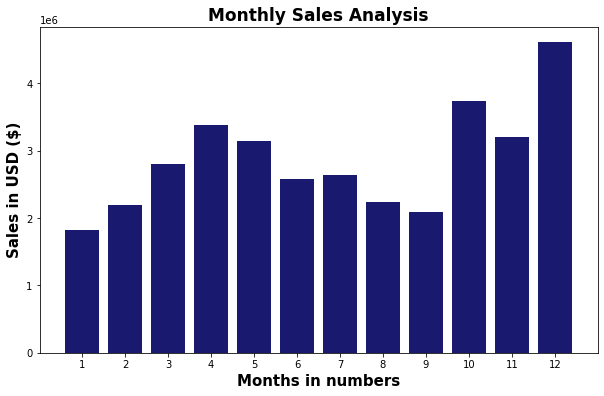

In [25]:
months = range(1, 13)
plt.figure(figsize=(10,6))
plt.bar(months, results["Tot_Price"], color = 'midnightblue')
plt.xticks(months)
plt.title("Monthly Sales Analysis", size = 17, weight='bold')
plt.xlabel("Months in numbers", size = 15, weight='bold')
plt.ylabel("Sales in USD ($)", size = 15, weight='bold')
plt.show()


In [5]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Tot_Price,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


##### Converting Order date col datatype and adding new column - City

In [14]:
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])

In [15]:
import re
addr = all_data.loc[2, "Purchase Address"]
re.search(', (.+?)[0-9]', addr).group(1)


'Boston, MA '

In [16]:
temp_city = all_data["Purchase Address"].apply(lambda x: re.search(', (.+?)[0-9]', x).group(1))
all_data.insert(7, "City", temp_city, True)

In [17]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Tot_Price,Order Date,Purchase Address,City,Month
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001","Dallas, TX",4
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215","Boston, MA",4
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001","Los Angeles, CA",4
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001","Los Angeles, CA",4
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001","Los Angeles, CA",4


##### Finding which city produced maximum sales

In [40]:
city_sales = all_data.groupby("City")

In [41]:
city_dict = {}
for name, group in city_sales:
    csales = group["Tot_Price"].agg(np.sum)
    city_dict[name] = csales

max_sale = max(city_dict, key=city_dict.get)
max_s = max(city_dict.values())
print("Month with Maximum sales is:",max_sale)
print(f"Total sales acheived on month {max_sale} is: {max_s}")

Month with Maximum sales is: San Francisco, CA 
Total sales acheived on month San Francisco, CA  is: 8262203.909999999


#### Visualizing Sales data on each city

In [42]:
city_results = city_sales["Tot_Price"].sum()

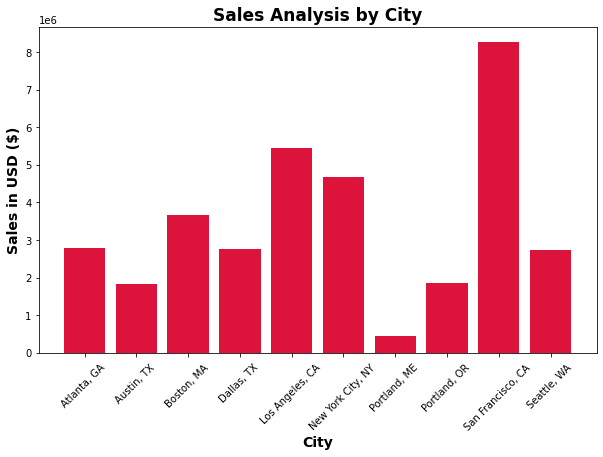

In [48]:
#city_names = city_sales.key()
city_names = []
for name, group in city_sales:
    #print(name)
    city_names.append(name)
    
plt.figure(figsize=(10,6))
plt.bar(city_names, city_results, color="crimson")
plt.xticks(city_names)
plt.xticks(rotation = 45)
plt.xlabel("City", size = 14, weight='bold')
plt.ylabel("Sales in USD ($)", size = 14, weight='bold')
plt.title("Sales Analysis by City", size = 17, weight='bold')
plt.show()

##### What time should we displaly advertisements to maximise sales

In [40]:
all_data["Hour"] = all_data["Order Date"].dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Tot_Price,Order Date,Purchase Address,City,Month,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001","Dallas, TX",4,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215","Boston, MA",4,22,30,1
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001","Los Angeles, CA",4,14,38,1
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001","Los Angeles, CA",4,14,38,1
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001","Los Angeles, CA",4,9,27,1


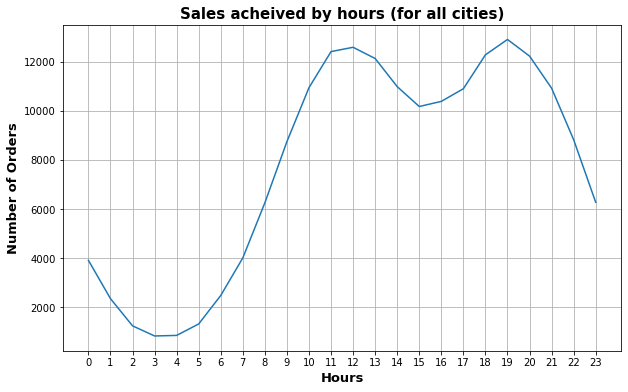

Advertisements can be published between 11 am to 12 pm and 6 pm to 7 pm


In [56]:
#checking on a whole for all cities
hour_sales = all_data.groupby("Hour")
hours = []
for name, group in hour_sales:
    #print(name)
    hours.append(name)

plt.figure(figsize=(10,6))
plt.plot(hours, hour_sales.count()['Count'])
plt.xticks(hours)
plt.title("Sales acheived by hours (for all cities)", size = 15, weight = 'bold')
plt.xlabel("Hours", size=13, weight='bold')
plt.ylabel("Number of Orders", size=13, weight='bold')
plt.grid()
plt.show()

print("Advertisements can be published between 11 am to 12 pm and 6 pm to 7 pm")

###### Checking specifically for San Fransisco

In [46]:
all_data["City"] = all_data["City"].apply(lambda x: x.strip())
all_data.loc[2, "City"]
san_df = all_data.copy()[all_data["City"] == "San Francisco, CA"]
san_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Tot_Price,Order Date,Purchase Address,City,Month,Hour,Minute,Count
6,176562,USB-C Charging Cable,1,11.95,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016","San Francisco, CA",4,13,3,1
9,176565,Macbook Pro Laptop,1,1700.00,1700.00,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016","San Francisco, CA",4,10,38,1
17,176573,USB-C Charging Cable,1,11.95,11.95,2019-04-27 18:41:00,"214 Chestnut St, San Francisco, CA 94016","San Francisco, CA",4,18,41,1
29,176584,Flatscreen TV,1,300.00,300.00,2019-04-24 20:39:00,"936 Church St, San Francisco, CA 94016","San Francisco, CA",4,20,39,1
32,176586,AAA Batteries (4-pack),2,2.99,5.98,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016","San Francisco, CA",4,17,0,1


San Fransisco, CA - Sales


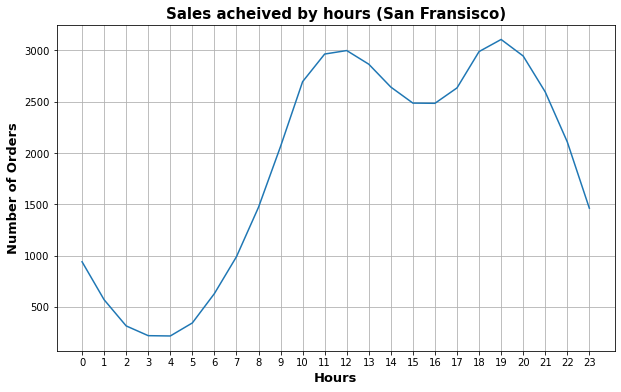

In [55]:
sanhour_sales = san_df.groupby("Hour")
san_hours = []
for name, group in sanhour_sales:
    #print(name)
    san_hours.append(name)

print("San Fransisco, CA - Sales")
plt.figure(figsize=(10,6))
plt.plot(san_hours, sanhour_sales.count()['Count'])
plt.xticks(san_hours)
plt.title("Sales acheived by hours (San Fransisco)", size = 15, weight = 'bold')
plt.xlabel("Hours", size=13, weight='bold')
plt.ylabel("Number of Orders", size=13, weight='bold')
plt.grid()
plt.show()


# Advertisements can be published between 11 am to 12 pm and 6 pm to 7 pm

##### What products are often sold together

In [58]:
all_data["Order Date"].duplicated(keep=False)

0          True
2          True
3          True
4          True
5          True
          ...  
186845     True
186846    False
186847    False
186848    False
186849    False
Name: Order Date, Length: 185950, dtype: bool

In [60]:
cols = [col for col in all_data.columns if col not in ["Product"]]
cols
biprod = all_data[all_data.duplicated(['Order ID', 'Purchase Address'], keep=False)]
biprod.head()


,Order ID,Product,Quantity Ordered,Price Each,Tot_Price,Order Date,Purchase Address,City,Month,Hour,Minute,Count
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001","Los Angeles, CA",4,14,38,1
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001","Los Angeles, CA",4,14,38,1
18,176574,Google Phone,1,600.00,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001","Los Angeles, CA",4,19,42,1
19,176574,USB-C Charging Cable,1,11.95,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001","Los Angeles, CA",4,19,42,1
30,176585,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215","Boston, MA",4,11,31,1


In [61]:
biprod.count()

Order ID            14649
Product             14649
Quantity Ordered    14649
Price Each          14649
Tot_Price           14649
Order Date          14649
Purchase Address    14649
City                14649
Month               14649
Hour                14649
Minute              14649
Count               14649
dtype: int64

In [62]:
biprod["Grouped"] = biprod.groupby("Order ID")["Product"].transform(lambda x: ','.join(x))
df = biprod[["Order ID", "Grouped"]].drop_duplicates()
df.head()

C:\Users\bhara\AppData\Local\Temp\ipykernel_26112\3462705811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biprod["Grouped"] = biprod.groupby("Order ID")["Product"].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [64]:
from itertools import combinations
from collections import Counter

count = Counter()
for row in df["Grouped"]:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

count.most_common(10)


[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

##### Finding which product had maximum sales and why

Totally 31017 AAA Batteries (4-pack)s were ordered, Which is highest!!


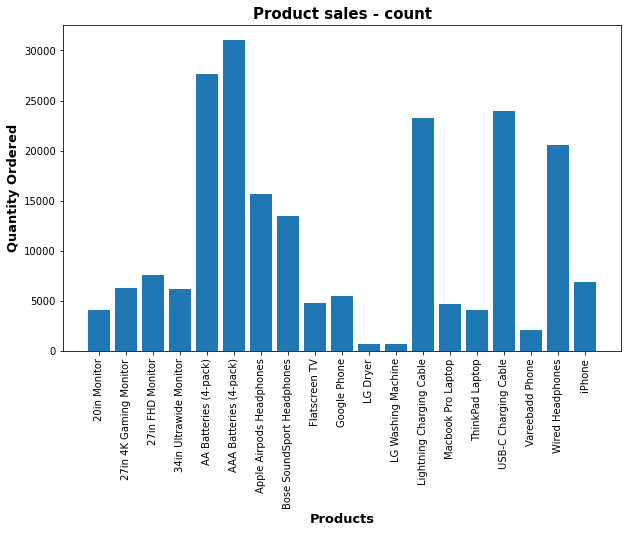

In [66]:
prod_sales = all_data.groupby("Product")
prod_dict = {}
for name, group in prod_sales:
    sales = group["Quantity Ordered"].agg(np.sum)
    prod_dict[name] = sales
    
max_prod = max(prod_dict, key=prod_dict.get)
tot = max(prod_dict.values())

print(f"Totally {tot} {max_prod}s were ordered, Which is highest!!")

#plottinng in graph
res = prod_sales["Quantity Ordered"].sum() 
prod_names = []
for name, group in prod_sales:
    prod_names.append(name)
    
plt.figure(figsize=(10,6))
plt.bar(prod_names, res)
plt.xticks(prod_names)
plt.xticks(rotation = "vertical")
plt.title("Product sales - count", size = 15, weight='bold')
plt.xlabel("Products", size=13, weight='bold')
plt.ylabel("Quantity Ordered", size=13, weight='bold')
plt.show()

##### Adding secondary y axis that maps price to find cov

Bar graph: Quantity Ordered
Line graph: Price


C:\Users\bhara\AppData\Local\Temp\ipykernel_26112\2071935835.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(prod_names, rotation="vertical")


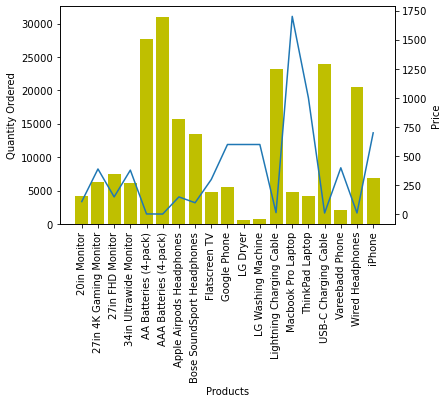

In [84]:
prices = all_data.groupby("Product").mean()["Price Each"]
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(prod_names, res, color='y')
ax2.plot(prod_names, prices)
ax1.set_xlabel("Products")
ax1.set_ylabel("Quantity Ordered")
ax2.set_ylabel("Price")
ax1.set_xticklabels(prod_names, rotation="vertical")
print("Bar graph: Quantity Ordered")
print("Line graph: Price")
plt.show()